In [1]:
import pomegranate as pg
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Ground Truth Model
Let's build a Bayesian Network representing a distirbution over illness x, illness y, symptoms, exposure and treatment. 

In [2]:
x = pg.DiscreteDistribution({'t': 0.1, 'f': 0.9})
y = pg.DiscreteDistribution({'t': 0.05, 'f': 0.95})
e = pg.DiscreteDistribution({'t': 0.05, 'f': 0.95})
s = pg.ConditionalProbabilityTable(
    [['f', 'f', 't', 0.6],
     ['f', 'f', 'f', 0.4],
     ['f', 't', 't', 0.7],
     ['f', 't', 'f', 0.3],
     ['t', 'f', 't', 0.8],
     ['t', 'f', 'f', 0.2],
     ['t', 't', 't', 0.95],
     ['t', 't', 'f', 0.05]], [x, y]
)
t = pg.ConditionalProbabilityTable(
    [['f', 'f', 't', 0.05],
     ['f', 'f', 'f', 0.95],
     ['f', 't', 't', 0.8],
     ['f', 't', 'f', 0.2],
     ['t', 'f', 't', 0.6],
     ['t', 'f', 'f', 0.4],
     ['t', 't', 't', 0.1],
     ['t', 't', 'f', 0.0]], [s, e]
)

X, Y, E, S, T = pg.Node(x, name='illness x'), pg.Node(y, name='illness y'), pg.Node(e, name='exposure'), pg.Node(s, name='symptoms'), pg.Node(t, name='treatment')
model = pg.BayesianNetwork('Network')
model.add_states(X, Y, E, S, T)
model.add_edge(X, S)
model.add_edge(Y, S)
model.add_edge(S, T)
model.add_edge(E, T)
model.bake()

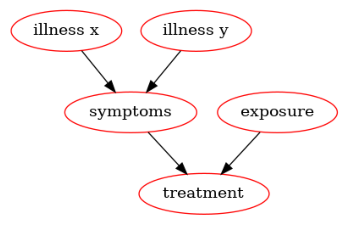

In [3]:
model.plot()

Predict probability of patient being treated given evidence.

In [4]:
model.predict_proba([['t', 'f', None, None, None]])

[array(['t', 'f', {
                      "class" : "Distribution",
                      "dtype" : "str",
                      "name" : "DiscreteDistribution",
                      "parameters" : [
                          {
                              "t" : 0.014522821576763623,
                              "f" : 0.9854771784232363
                          }
                      ],
                      "frozen" : false
                  }                                      ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "f" : 0.20746887966805005,
                    "t" : 0.7925311203319501
                }
            ],
            "frozen" : false
        }                                     ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "p

In [5]:
data = model.sample(1000)

## Wrong Model
The second model defines a distrbition over the same variables and same marginal probabilities as the ground truth does, but with a different factorization.

In [6]:
x = pg.DiscreteDistribution({'t': 0.1, 'f': 0.9})
y = pg.DiscreteDistribution({'t': 0.05, 'f': 0.95})
s = pg.ConditionalProbabilityTable(
    [['f', 'f', 't', 0.125],
     ['f', 'f', 'f', 0.125],
     ['f', 't', 't', 0.125],
     ['f', 't', 'f', 0.125],
     ['t', 'f', 't', 0.125],
     ['t', 'f', 'f', 0.125],
     ['t', 't', 't', 0.125],
     ['t', 't', 'f', 0.125]], [x, y]
)
t = pg.ConditionalProbabilityTable(
    [['f', 't', 0.25],
     ['f', 'f', 0.25],
     ['t', 't', 0.25],
     ['t', 'f', 0.25]], [s]
)
e = pg.ConditionalProbabilityTable(
    [['f', 'f', 't', 0.125],
     ['f', 'f', 'f', 0.125],
     ['f', 't', 't', 0.125],
     ['f', 't', 'f', 0.125],
     ['t', 'f', 't', 0.125],
     ['t', 'f', 'f', 0.125],
     ['t', 't', 't', 0.125],
     ['t', 't', 'f', 0.125]], [s, t]
)

X, Y, E, S, T = pg.Node(x, name='illness x'), pg.Node(y, name='illness y'), pg.Node(e, name='exposure'), pg.Node(s, name='symptoms'), pg.Node(t, name='treatment')
model = pg.BayesianNetwork('Network')
model.add_states(X, Y, E, S, T)
model.add_edge(X, S)
model.add_edge(Y, S)
model.add_edge(S, T)
model.add_edge(T, E)
model.add_edge(S, E)
model.bake()
model.fit(data)

{
    "class" : "BayesianNetwork",
    "name" : "Network",
    "structure" : [
        [],
        [],
        [
            3,
            4
        ],
        [
            0,
            1
        ],
        [
            3
        ]
    ],
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "t" : 0.086,
                        "f" : 0.914
                    }
                ],
                "frozen" : false
            },
            "name" : "illness x",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
   

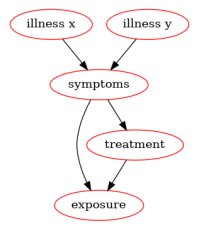

In [7]:
model.plot()

Predict the probability of a patient being treated in this case.

In [8]:
model.predict_proba([['t', 'f', None, None, None]])

[array(['t', 'f', {
                      "class" : "Distribution",
                      "dtype" : "str",
                      "name" : "DiscreteDistribution",
                      "parameters" : [
                          {
                              "f" : 0.9453862563470095,
                              "t" : 0.05461374365299053
                          }
                      ],
                      "frozen" : false
                  }                                    ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "f" : 0.19753086419753124,
                    "t" : 0.8024691358024687
                }
            ],
            "frozen" : false
        }                                     ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "para